<a href="https://colab.research.google.com/github/nicole-yoong/Portfolio/blob/main/Diabetes_Detection/%5BPart_2%5D_Compare_Grid_and_RandomizedSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std

import time
print("Setup complete.")

Setup complete.


# Loading data

In [ ]:
df = pd.read_csv('/content/DiabetesClassificationDataset2022.csv')
df.head(5)

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,...,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,...,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,...,46.0,0,0,0,0,0,0,0,1,1


# Data exploration

Download the dataset and prepare a summary of the features available on the 
dataset including data type (numerical/ categorical), amount of missing data in 
individual fields. This can be included as an appendix.


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

(79159, 88)

In [ ]:
df.describe()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,76317.000000,79159.000000,77978.000000,77086.000000,76468.000000,79159.0,61223.000000,61223.000000,...,78931.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.452389,0.189404,169.565316,85.114552,29.600786,0.0,36.721315,36.612966,...,87.278128,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.446715,0.391831,10.835017,25.465505,8.487987,0.0,0.771686,0.795767,...,42.058748,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.700000,23.875433,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.029903,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.400000,33.420162,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

encounter_id                       0
hospital_id                        0
gender                            30
ethnicity                        961
age                             2842
elective_surgery                   0
height                          1181
weight                          2073
bmi                             2691
readmission_status                 0
icu_type                           0
h1_temp_max                    17936
h1_temp_min                    17936
d1_albumin_max                 43093
d1_albumin_min                 43093
d1_bilirubin_max               46477
d1_bilirubin_min               46477
d1_bun_max                      7910
d1_bun_min                      7910
d1_glucose_min                  4359
d1_hco3_max                    11901
d1_hco3_min                    11901
d1_inr_max                     49466
d1_inr_min                     49466
d1_lactate_max                 57809
d1_lactate_min                 57809
d1_platelets_max               11166
d

## Visualization

### Distribution of diabetes

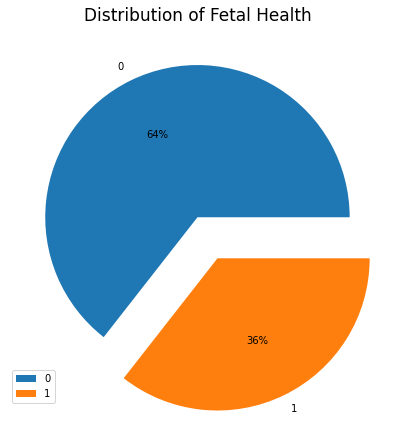

In [ ]:
X = df['diabetes_mellitus'].value_counts()
labels = ['0', '1']
plt.get_cmap('hsv')
plt.figure(figsize = (14,7))
plt.title('Distribution of Fetal Health', fontsize = 17)
plt.pie(X, labels = labels, autopct='%.0f%%', explode=[0,.3])
plt.legend()
plt.show()

# Data cleaning

## Missing values

In [ ]:
#check how many missing values in each column

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing %'])
missing_data.head(88)


,Total,Missing %
h1_bilirubin_min,72849,0.920287
h1_bilirubin_max,72849,0.920287
h1_albumin_min,72271,0.912985
h1_albumin_max,72271,0.912985
h1_lactate_min,71985,0.909372
h1_lactate_max,71985,0.909372
h1_pao2fio2ratio_max,68816,0.869339
h1_pao2fio2ratio_min,68816,0.869339
h1_arterial_ph_max,65389,0.826046
h1_arterial_ph_min,65389,0.826046


In [ ]:
#dealing with missing data
df = df.drop((missing_data[missing_data['Missing %'] > 0.6]).index,1)
df.isnull().sum().max() #just checking that there's no missing data missing...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


46477

### Random fill-in

In [ ]:
from random import choice

mask = df["gender"].isna()
df.loc[mask,["gender"]] = df.loc[mask,["gender"]].applymap(lambda _: choice(["M","F"]))

In [ ]:
mask = df["ethnicity"].isna()
df.loc[mask,["ethnicity"]] = df.loc[mask,["ethnicity"]].applymap(lambda _: choice(["Caucasian","African American",
                                                                             'Other/Unknown', 'Hispanic', 'Asian', 'Native American']))

### Imputation 

In [ ]:
imp_df= df.fillna(method='bfill', axis=0).fillna(0)
imp_df.describe() 

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.0,79159.000000,79159.000000,...,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.454036,0.189404,169.565825,85.141136,29.602947,0.0,36.721336,36.612534,...,87.269899,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.451232,0.391831,10.831737,25.462159,8.485454,0.0,0.769038,0.793106,...,42.058765,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.800000,23.876404,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.039729,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.430000,33.421693,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#check missing values again
imp_df.isnull().sum().max() 

0

In [ ]:
df = imp_df

## Removing columns

### Removing not useful columns

In [ ]:
#drop the columns that are not useful
df = df.loc[:, ~df.columns.isin(["encounter_id", "hospital_id", 'height', 'weight','readmission_status'])]

### Removing highly correlated columns

In [ ]:
X = df.loc[:, ~df.columns.isin(['diabetes_mellitus'])]

#extract the target column
y = df["diabetes_mellitus"] 

In [ ]:
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)


['d1_albumin_min', 'd1_bilirubin_min', 'd1_bun_min', 'd1_platelets_min', 'd1_wbc_min', 'h1_glucose_min']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
df = df.loc[:, ~df.columns.isin(['d1_albumin_min', 'd1_bilirubin_min', 'd1_bun_min', 'd1_platelets_min', 'd1_wbc_min', 'h1_glucose_min'])]

## Categorical and Numerical 

In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 4.4 MB/s 


In [ ]:
#divide our columns in to the categorical and numerical columns for variables that are useful for prediction of diabetes

cat_col = ["gender", "ethnicity", "icu_type"]
num_col = df.loc[:, ~df.columns.isin(["gender", "ethnicity", "icu_type"])]

In [ ]:
#Let us run loop of value_counts of each column to find out unique values. 
for col in df[cat_col]:
    print ("---- %s ---" % col)
    print (df[col].value_counts())

---- gender ---
M    42928
F    36231
Name: gender, dtype: int64
---- ethnicity ---
Caucasian           60537
African American     8956
Other/Unknown        4064
Hispanic             3295
Asian                1529
Native American       778
Name: ethnicity, dtype: int64
---- icu_type ---
Med-Surg ICU    43608
MICU             6816
CCU-CTICU        6809
Neuro ICU        6077
Cardiac ICU      5069
SICU             4902
CSICU            3138
CTICU            2740
Name: icu_type, dtype: int64


### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ["ethnicity", "icu_type", 'gender']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.loc[:, df.columns.isin(["gender", "ethnicity", "icu_type"])].head(10)

,gender,ethnicity,icu_type
0,1,2,2
1,0,2,5
2,0,2,2
3,1,2,5
4,0,2,5
5,1,2,5
6,0,2,5
7,0,2,4
8,1,2,4
9,0,2,0


# Class imbalance

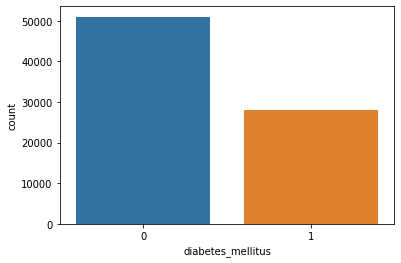

In [ ]:
sns.countplot(x= 'diabetes_mellitus', data=df)

## Resampling



In [ ]:
X = df.loc[:, df.columns.isin(['h1_glucose_max', 'd1_glucose_min', 'bmi', 'd1_bun_max', 'creatinine_apache', 
                               'd1_bilirubin_max','ethnicity', 'd1_potassium_max', 'gender', 'age'])]
y = df["diabetes_mellitus"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train, y_train = nr.fit_resample(X_train, y_train.ravel())

print('After UnderSampling, the shape of X_train: {}'.format(X_train.shape))
print('After UnderSampling, the shape of y_train: {} \n'.format(y_train.shape))
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train == 0)))

After UnderSampling, the shape of X_train: (39412, 10)
After UnderSampling, the shape of y_train: (39412,) 

After UnderSampling, counts of label '1': 19706
After UnderSampling, counts of label '0': 19706


In [ ]:
pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=2))
                 ])

x_train = pipe_dt.fit_transform(X_train)
x_test = pipe_dt.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(39412, 10) (39412,) (23748, 10)


# Model building

# DTC with GridSearchCV

In [ ]:
t_start = time.process_time()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state=1024)
tuned_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = 5)
tuned_dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_dtc.score(x_train, y_train)

best_estimator = tuned_dtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

27.220698317
0.7372373896275246
              precision    recall  f1-score   support

           0       0.77      0.69      0.72     15302
           1       0.52      0.62      0.57      8446

    accuracy                           0.66     23748
   macro avg       0.64      0.65      0.65     23748
weighted avg       0.68      0.66      0.67     23748



([<matplotlib.axis.YTick at 0x7f8fe87f3a50>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

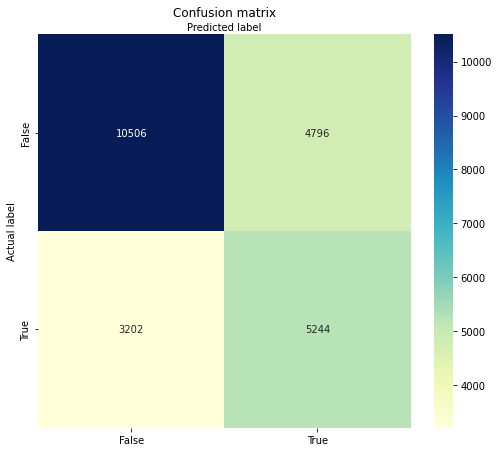

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# DTC with RandomSearchCV

In [ ]:
t_start = time.process_time()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state=1024)
tuned_dtc = RandomizedSearchCV(estimator = dtc, param_distributions = param_grid, cv = 5)
tuned_dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_dtc.score(x_train, y_train)

best_estimator = tuned_dtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

3.832148582000002
0.7381761899928956
              precision    recall  f1-score   support

           0       0.76      0.69      0.73     15302
           1       0.52      0.61      0.56      8446

    accuracy                           0.66     23748
   macro avg       0.64      0.65      0.64     23748
weighted avg       0.68      0.66      0.67     23748



([<matplotlib.axis.YTick at 0x7f8fe87a5b50>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

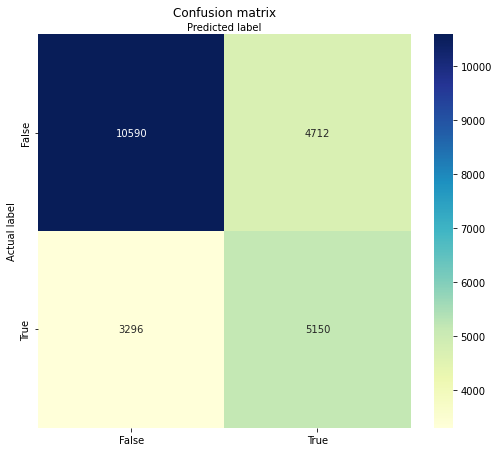

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)